# Read the text


In [11]:
import pandas as pd
data = pd.read_csv('SMSSpamCollection.tsv', sep='\t')
data.columns = ['label', 'body_text']
data.head()

,label,body_text
0,spam,Free entry in 2 a wkly comp to win FA Cup fina...
1,ham,"Nah I don't think he goes to usf, he lives aro..."
2,ham,Even my brother is not like to speak with me. ...
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!
4,ham,As per your request 'Melle Melle (Oru Minnamin...


# Create Feature for text message length


In [12]:
data['body_len'] =data['body_text'].apply(lambda x: len(x) - x.count(' '))
data.head()

,label,body_text,body_len
0,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128
1,ham,"Nah I don't think he goes to usf, he lives aro...",49
2,ham,Even my brother is not like to speak with me. ...,62
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28
4,ham,As per your request 'Melle Melle (Oru Minnamin...,135


# Create feature for % of text that is punctuation

In [24]:
import string
def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round((count / (len(text) - text.count(' '))) * 100, 3)

data['body_per_punct'] = data['body_text'].apply(count_punct)
data.head()

,label,body_text,body_len,body_per_punct
0,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128,4.688
1,ham,"Nah I don't think he goes to usf, he lives aro...",49,4.082
2,ham,Even my brother is not like to speak with me. ...,62,3.226
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28,7.143
4,ham,As per your request 'Melle Melle (Oru Minnamin...,135,4.444


# EValuate create features

In [26]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

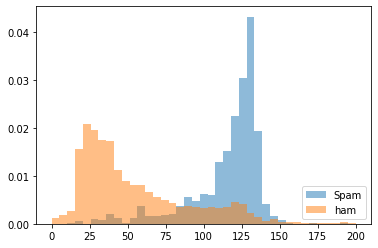

In [32]:
bins = np.linspace(0, 200, 40)

plt.hist(data[data['label'] == 'spam']['body_len'], bins, alpha=0.5, density=True, label='Spam')
plt.hist(data[data['label'] == 'ham']['body_len'], bins, alpha=0.5, density=True, label='ham')
plt.legend(loc = 4)
plt.show()

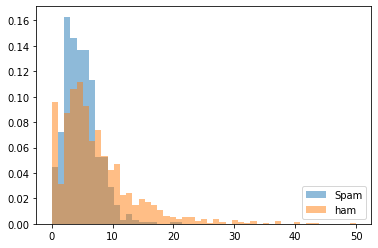

In [37]:
bins = np.linspace(0, 50, 50)

plt.hist(data[data['label'] == 'spam']['body_per_punct'], bins, alpha=0.5, density=True, label='Spam')
plt.hist(data[data['label'] == 'ham']['body_per_punct'], bins, alpha=0.5, density=True, label='ham')
plt.legend(loc = 4)
plt.show()

# Transfomation

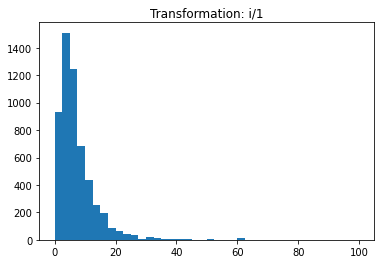

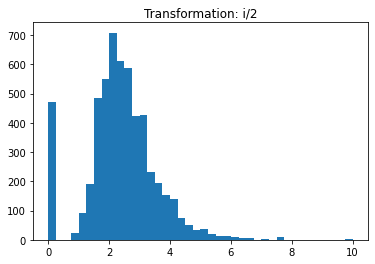

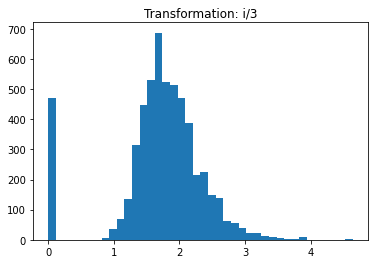

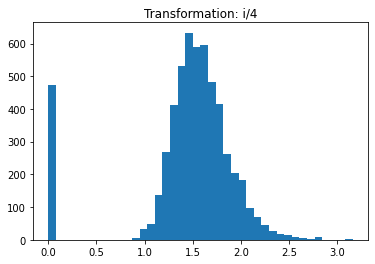

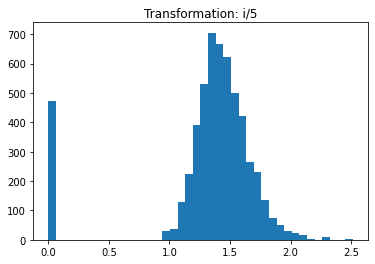

In [40]:
for i in [1,2,3,4,5]:
    plt.hist((data['body_per_punct'])**(1/i), bins=40)
    plt.title('Transformation: i/{}'.format(str(i)))
    plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=c110350c-d27f-445e-a2fe-f71c16e85564' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>